# Fake News Detection
**Name:** Eliana Kariuki

**Group:** Group 2B

### BUSINESS UNDERSTANDING

In today's information-driven society, the spread of misinformation and fake news through online news dissemination platforms and social media platforms has become a serious threat to public trust, democracy, health communication, and media integrity. The ability to automatically distinguish fake from real news is essential for:

Social media platforms (e.g., Meta, Twitter/X, Reddit). 
Fact-checking organizations. 
News aggregators (e.g., Google News, Apple News). 
The general public. 


#### Problem Statement:

The proliferation of fake news on digital platforms poses a significant risk to public trust and decision-making. Traditional methods of identifying fake news are slow and resource-intensive, making it difficult to manage the vast volume of online content.

#### Proposed solution
This project aims to develop an automated binary classification system using transformer-based Natural Language Processing (NLP) models to detect and flag fake news articles with high accuracy. By leveraging advanced NLP techniques, the system will offer a scalable solution to help identify harmful misinformation, improving information credibility and supporting the fight against digital manipulation.

#### OBJECTIVES
1. Improve Detection Accuracy with Advanced Models:

Leverage state-of-the-art models (e.g., BERT, RoBERTa, XGBoost) to increase the accuracy of fake news detection, ensuring that only credible news reaches the end-users.

2. Automate Fake News Detection for Real-Time Content Moderation:

Implement machine learning algorithms (e.g., Logistic Regression, Naïve Bayes, Random Forest) for real-time detection and flagging of fake news across social media platforms and news websites, enhancing content moderation efficiency.

3. Enhance Content Trustworthiness for News Platforms:

Use transformer-based models (e.g., BERT, DistilBERT) to automatically validate the authenticity of news articles, thereby improving the trustworthiness and reliability of content presented to users on platforms like Google News and Twitter.

4. Reduce the Spread of Misinformation through Scalable Solutions:

Deploy scalable models such as XGBoost and LSTM to identify fake news across large volumes of content, helping reduce the widespread impact of misinformation in areas like public health and politics.

5. Support Fact-Checking Organizations with Efficient Tools:

Enable fact-checking organizations to use machine learning models like RoBERTa and Naïve Bayes to automate the verification of news, increasing operational efficiency and response times to counter fake news.

### Data source
We use 4 labelled datasets 
- gossipcop_fake.csv
-  gossipcop_real.csv
- politifact_fake.csv
- politifact_real.csv

The data was cloned from the FakeNewsNet Dataset (https://github.com/KaiDMML/FakeNewsNet/tree/master/dataset).  

Each of the four datasets contain the following metadata:

- news_url: The URL of the news article.
- title: The headline/title of the news article.
- extracted_article_text: The main body of the article.
- news_type: The category or type of the news (e.g., gossip).
- class: A label, likely indicating whether the news is classified as fake (1) or real (0).

### Data scrapping
For this project, we scraped from the 4 labelled datasets, specifically targeting articles labeled as fake or real. The data scraping process enabled the collection of a diverse set of news articles from prominent platforms, ensuring a comprehensive dataset for training and evaluating the fake news detection model. This dataset will then preprocessed and prepared for analysis, allowing for the development of an automated system to detect misinformation effectively.




### DATA PREPARATION

In data preparation we will do the following:

- Loading the data:Importing data from various sources (e.g., CSV, Excel, databases) into a working environment like Pandas DataFrame.

- Exploratory Data Analysis: Inspecting the data to understand its structure, types, distribution of target variables and initial statistics.

In [ ]:
# data loading 
import pandas as pd
data = pd.read_csv(r'C:\Users\HomePC\Documents\Fake-News-Detection-\dataset\data.csv')

In [4]:
data.head()  # Display the first few rows of the dataset

,news_url,title,extracted_article_text,news_type,class
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1


In [14]:
#statistical summary of the dataset
data.describe()  

,class
count,16044.000000
mean,0.771316
std,0.419998
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


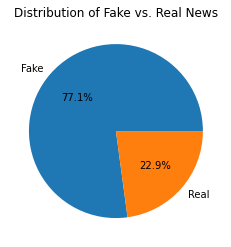

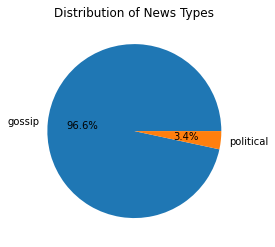

In [20]:
# target variable distribution

import matplotlib.pyplot as plt
data['class'].value_counts().plot.pie(autopct='%1.1f%%', 
                                      labels=['Fake', 'Real'],)
plt.title('Distribution of Fake vs. Real News')
plt.ylabel('')
plt.show()

#news type distribution pie chart
data['news_type'].value_counts().plot.pie(autopct='%1.1f%%', 
                                           labels=data['news_type'].unique())
plt.title('Distribution of News Types')
plt.ylabel('')
plt.show()


### DATA PREPROCESSING 

### Data Preprocessing for Fake News Detection: Summary

To prepare the dataset for fake news detection, the following preprocessing steps will be undertaken:

1. **Handling Missing Data**:

   * Check for and handle any missing values (though none are expected based on the current dataset).

2. **Text Preprocessing**:

   * **Lowercasing**: Convert all text in both `title` and `extracted_article_text` to lowercase for consistency.
   * **Removing Punctuation & Special Characters**: Clean the text by removing punctuation, special characters, and non-alphanumeric symbols.
   * **Removing Stop Words**: Remove common, non-informative words (e.g., “the,” “and,” “of”) from the text.
   * **Tokenization**: Split the text into individual words (tokens).
   * **Stemming/Lemmatization**: Reduce words to their root form (e.g., "running" → "run").
   * **Removing URLs & Numbers**: Eliminate URLs and numerical data, as they are usually not relevant for classification.

3. **Feature Engineering**:

   * **Text Length Features**: Calculate text length, word count, sentence count, and character count to capture relevant patterns.

4. **Text Vectorization**:

   * **Bag of Words (BoW)**: Convert text into a matrix of word frequencies.
   * **TF-IDF (Term Frequency-Inverse Document Frequency)**: Transform text into numerical vectors, considering the importance of words in the context of the entire dataset.
   * **Word Embeddings (Optional)**: Use Word2Vec or GloVe if semantic representation of words is required.

5. **Label Encoding**:

   * The target variable (`class`) is already encoded (0 for real news, 1 for fake news), so no further encoding is necessary.

6. **Train-Test Split**:

   * Split the dataset into training and testing sets (typically 80-20 or 70-30) to allow for model evaluation on unseen data.

7. **Scaling Features (Optional)**:

   * For certain machine learning algorithms (e.g., SVM, KNN), scaling numerical features like word count or sentence count may be required.

8. **Handling Class Imbalance (Optional)**:

   * If the dataset shows an imbalance between real and fake news articles, techniques like oversampling, undersampling, or using algorithms designed for imbalanced datasets may be applied.